In [ ]:
I#importing the libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#loading the data

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Online Retail.xlsx'
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


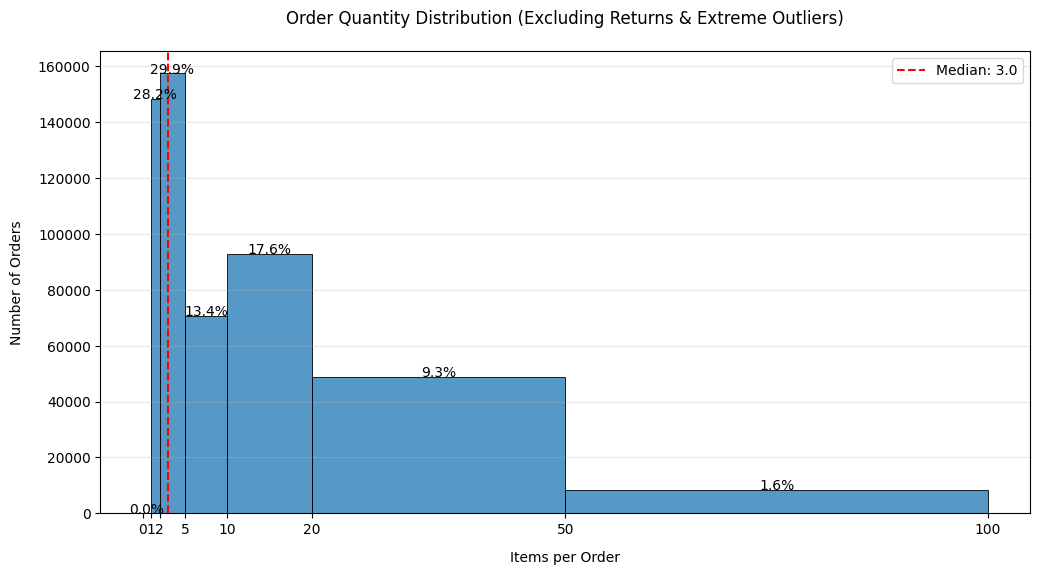


Quantity Statistics:
Average items per order: 7.9
Median items per order: 3.0
Most common order size: 1
Orders with 1 item: 28.2%
Bulk orders (10+ items): 28.5%


In [ ]:
#HISTOGRAM
# Filter out returns (negative quantities) and extreme outliers
positive_quantity = df[(df['Quantity'] > 0) & (df['Quantity'] <= 100)]

plt.figure(figsize=(12, 6))

# Create bins that make business sense
bins = [0, 1, 2, 5, 10, 20, 50, 100]
sns.histplot(data=positive_quantity, x='Quantity', bins=bins, kde=False, color='#1f77b4')

# Add median line
median = positive_quantity['Quantity'].median()
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.1f}')

# Add percentage annotations
total = len(positive_quantity)
for patch in plt.gca().patches:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width()/2., height+50,
             f'{height/total:.1%}', ha='center')

plt.title('Order Quantity Distribution (Excluding Returns & Extreme Outliers)', pad=20)
plt.xlabel('Items per Order', labelpad=10)
plt.ylabel('Number of Orders', labelpad=10)
plt.xticks(bins)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Additional statistics
print(f"\nQuantity Statistics:")
print(f"Average items per order: {positive_quantity['Quantity'].mean():.1f}")
print(f"Median items per order: {positive_quantity['Quantity'].median():.1f}")
print(f"Most common order size: {positive_quantity['Quantity'].mode()[0]}")
print(f"Orders with 1 item: {(positive_quantity['Quantity'] == 1).mean():.1%}")
print(f"Bulk orders (10+ items): {(positive_quantity['Quantity'] >= 10).mean():.1%}")

<ipython-input-17-ebda0662252c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='TotalSales', palette='viridis')


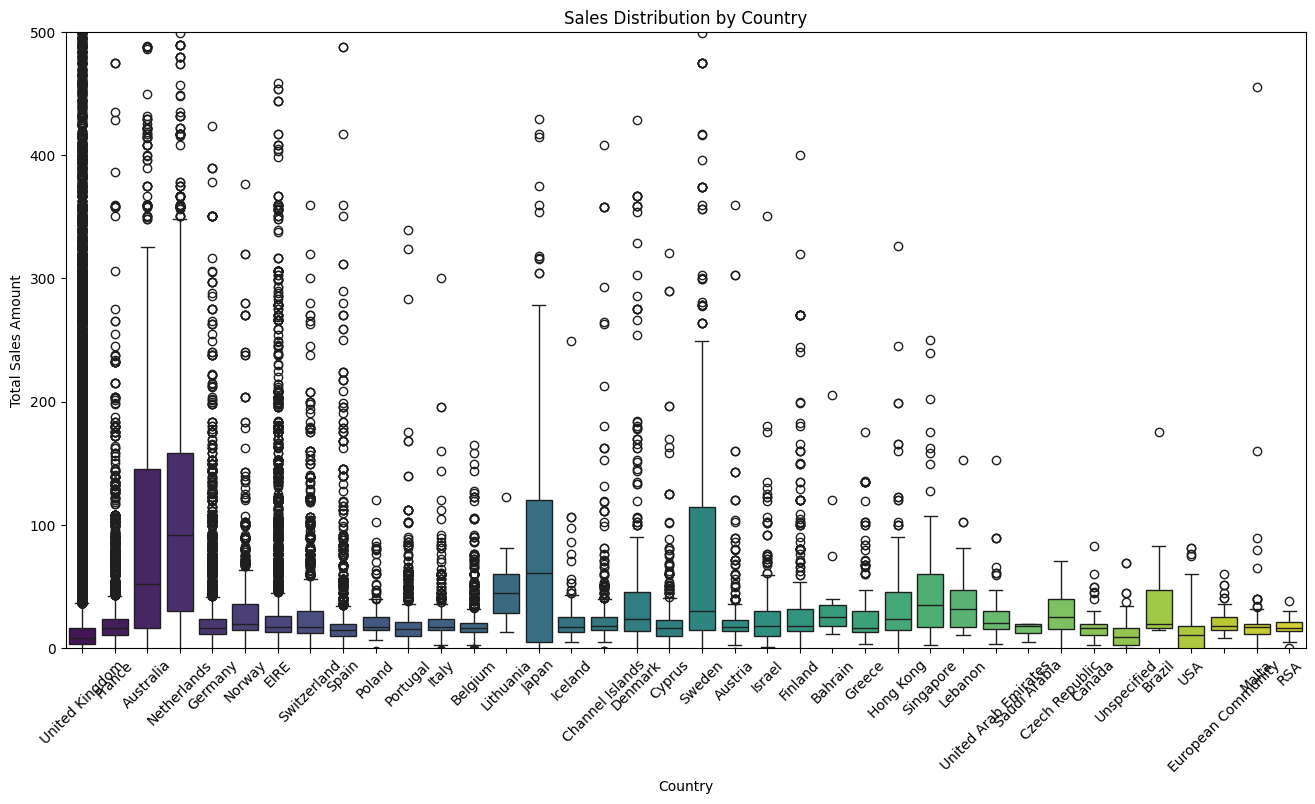

In [ ]:
#BOXPLOT
# Calculate TotalSales column (assuming 'Quantity' and 'UnitPrice' columns exist)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Country', y='TotalSales', palette='viridis')
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.ylim(0, 500)  # Adjust to exclude outliers
plt.show()

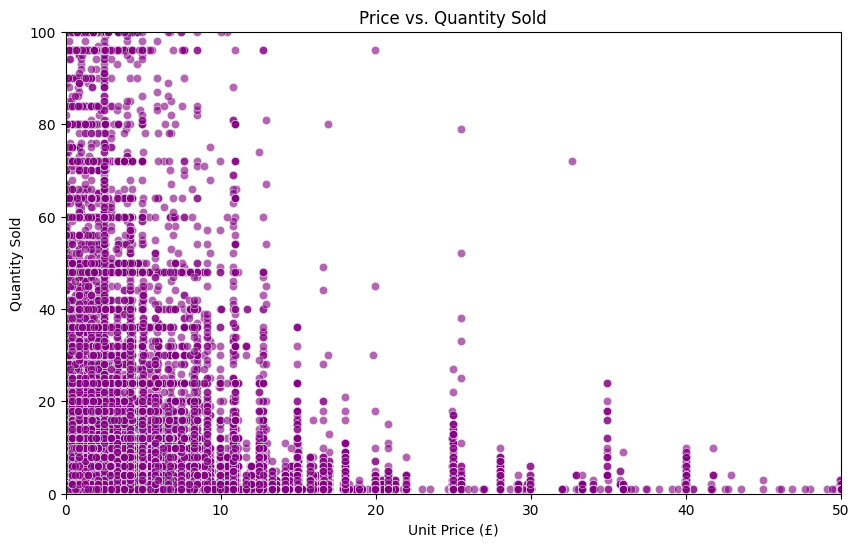

In [ ]:
#SCATTER PLOT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', alpha=0.6, color='purple')
plt.title('Price vs. Quantity Sold')
plt.xlabel('Unit Price (£)')
plt.ylabel('Quantity Sold')
plt.xlim(0, 50)  # Focus on typical price range
plt.ylim(0, 100)  # Focus on typical quantities
plt.show()

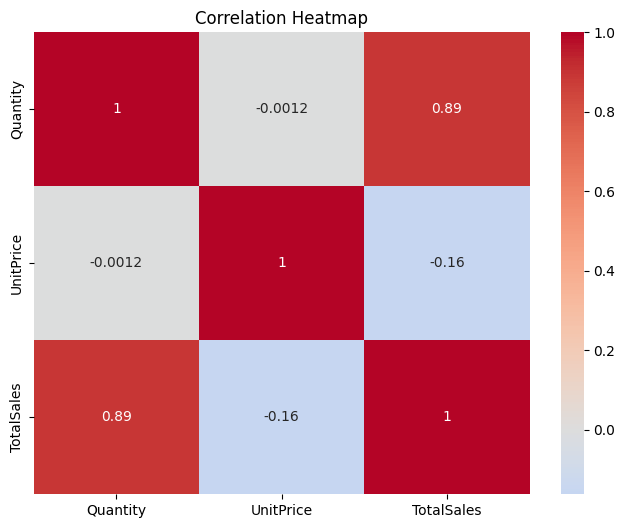

In [ ]:
#HEATMAP 1
# Calculate correlations
corr_matrix = df[['Quantity', 'UnitPrice', 'TotalSales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

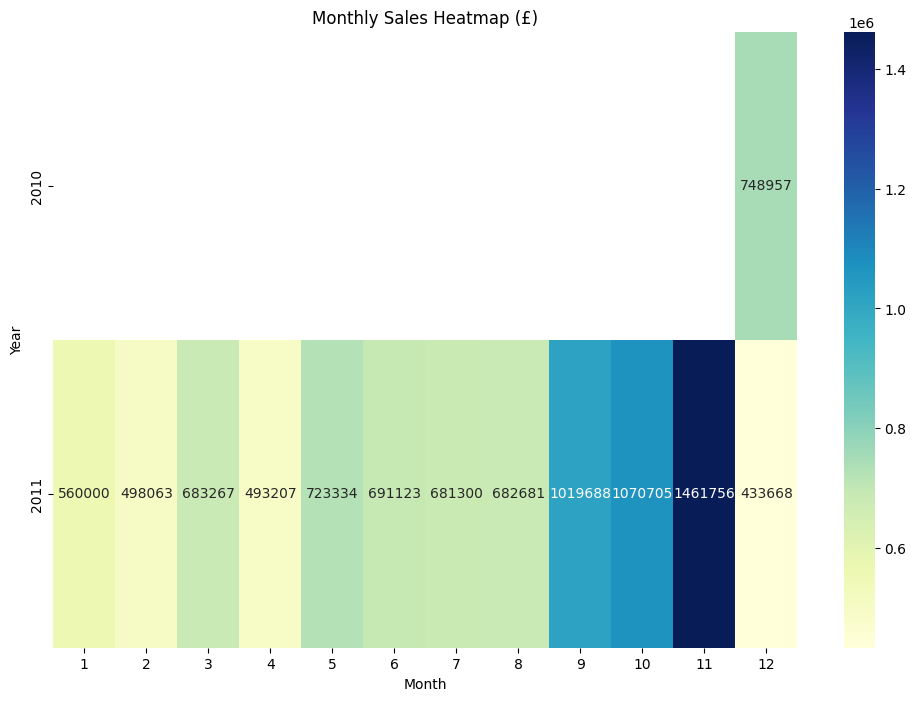

In [ ]:
#HEATMAP 2
# Pivot table for monthly sales
# Assuming 'InvoiceDate' column contains date information
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month

monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Sales Heatmap (£)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()